# Organizing the Facial Attractiveness Data

### Common Functions

In [1]:
def split_image_rating(line):
    line = line.replace("\n", "")
    split_index = line.index(" ")
    file_name = line[:split_index]
    rating = float(line[split_index+1:])

    return file_name, rating

### Arranging Data For Classification

In [2]:
import os
import shutil

In [3]:
os.mkdir("data/classification_train_test")

os.mkdir("data/classification_train_test/train")
os.mkdir("data/classification_train_test/test")

os.mkdir("data/classification_train_test/train/one")
os.mkdir("data/classification_train_test/train/two")
os.mkdir("data/classification_train_test/train/three")
os.mkdir("data/classification_train_test/train/four")
os.mkdir("data/classification_train_test/train/five")

os.mkdir("data/classification_train_test/test/one")
os.mkdir("data/classification_train_test/test/two")
os.mkdir("data/classification_train_test/test/three")
os.mkdir("data/classification_train_test/test/four")
os.mkdir("data/classification_train_test/test/five")

In [4]:
def images_to_classes(scores_list, dir):
    with open(scores_list) as file:
        lines = file.readlines()
        count = len(lines)
        for line in lines:
            image, rating = split_image_rating(line)
            rating = round(rating)
            impath = os.path.join("data\original_scut_data\Images", image)

            if rating == 1:
                new_path = os.path.join(dir, "one")
                shutil.copy(impath, new_path)
            elif rating == 2:
                new_path = os.path.join(dir, "two")
                shutil.copy(impath, new_path)
            elif rating == 3:
                new_path = os.path.join(dir, "three")
                shutil.copy(impath, new_path)
            elif rating == 4:
                new_path = os.path.join(dir, "four")
                shutil.copy(impath, new_path)
            elif rating == 5:
                new_path = os.path.join(dir, "five")
                shutil.copy(impath, new_path)
            else:
                print("???")
    print(f"Successfully copied {count} files.")

In [5]:
train_list = "data/original_scut_data/train_test_files/split_of_60%training and 40%testing/train.txt"
test_list = "data/original_scut_data/train_test_files/split_of_60%training and 40%testing/test.txt"

train_dir = "data/classification_train_test/train"
test_dir = "data/classification_train_test/test"

images_to_classes(train_list, train_dir)
images_to_classes(test_list, test_dir)

Successfully copied 3300 files.
Successfully copied 2200 files.


### Arranging Data for Regression

In [6]:
os.mkdir("data/regression_train_test")

os.mkdir("data/regression_train_test/train")
os.mkdir("data/regression_train_test/test")

In [7]:
def images_for_regression(scores_list, dir, train_or_test):
    scores_dic = {}

    # Copying the image files to the new directory
    with open(scores_list) as file:
        lines = file.readlines()
        count = len(lines)
        for line in lines:
            image, rating = split_image_rating(line)
            # Rating is turned into a string with a space so that I can add it to the .txt doc later.
            scores_dic[image] = str(rating) + " "
            impath = os.path.join("data\original_scut_data\Images", image)
            new_path = os.path.join(dir, train_or_test)

            shutil.copy(impath, new_path)

    print(f"Successfully copied {count} images.")

    # Since the new directory is in alphabetical order, these ratings are out of order.
    scores_dic = dict(sorted(scores_dic.items()))
    ratings = list(scores_dic.values())

    # Creates one really long line of ratings, can be split and casted later into 
    file = open(f"{dir}\{train_or_test}_ratings.txt","x")
    file.writelines(ratings)
    file.close()
    
    print(f"Successfully created {train_or_test}_ratings.txt.")

In [8]:
train_list = "data/original_scut_data/train_test_files/split_of_60%training and 40%testing/train.txt"
test_list = "data/original_scut_data/train_test_files/split_of_60%training and 40%testing/test.txt"

dir = "data/regression_train_test"

images_for_regression(train_list, dir, "train")
images_for_regression(test_list, dir, "test")

Successfully copied 3300 images.
Successfully created train_ratings.txt.
Successfully copied 2200 images.
Successfully created test_ratings.txt.


### Stratifying Male vs. Female for Regression

In [3]:
os.mkdir("data/gender_split_regression")

os.mkdir("data/gender_split_regression/m_train")
os.mkdir("data/gender_split_regression/m_test")

os.mkdir("data/gender_split_regression/f_train")
os.mkdir("data/gender_split_regression/f_test")

In [6]:
import numpy as np

train_txt = "data/regression_train_test/train_ratings.txt"
test_txt = "data/regression_train_test/test_ratings.txt"

with open(train_txt) as train_ratings:
    train_ratings = train_ratings.readlines()[0]
    train_ratings = np.array(train_ratings.split())
    train_ratings = train_ratings.astype(float)

with open(test_txt) as test_ratings:
    test_ratings = test_ratings.readlines()[0]
    test_ratings = np.array(test_ratings.split())
    test_ratings = test_ratings.astype(float)

print(train_ratings)
print(test_ratings)

[3.433333 2.9      3.966667 ... 3.05     2.4      2.666667]
[2.333333 3.45     2.7      ... 2.533333 4.433333 3.05    ]


In [42]:
import pathlib

train_dir = pathlib.Path("data/regression_train_test/train")
test_dir = pathlib.Path("data/regression_train_test/test")

train_images = list(train_dir.glob("*.jpg"))
test_images = list(test_dir.glob("*.jpg"))

# Split Training
m_train_dict = {}
f_train_dict = {}
for i, rating in enumerate(train_ratings):
    impath = str(train_images[i])
    if "M" in impath:
        m_train_dict[impath] = rating
        shutil.copy(train_images[i], "data/gender_split_regression/m_train")
    elif "F" in impath:
        f_train_dict[impath] = rating
        shutil.copy(train_images[i], "data/gender_split_regression/f_train")
    else:
        print("How? (Train)")

# Split Testing
m_test_dict = {}
f_test_dict = {}
for i, rating in enumerate(test_ratings):
    impath = str(test_images[i])
    if "M" in impath:
        m_test_dict[impath] = rating
        shutil.copy(test_images[i], "data/gender_split_regression/m_test")
    elif "F" in impath:
        f_test_dict[impath] = rating
        shutil.copy(test_images[i], "data/gender_split_regression/f_test")
    else:
        print("How? (Test)")

In [52]:
def write_txt(name, ratings_dict):
    ratings_dict = dict(sorted(ratings_dict.items()))
    ratings = list(ratings_dict.values())

    file = open(name, "x")
    file.writelines([str(x) + " " for x in ratings])
    file.close()

    print(f"{name} successfully created.")

In [54]:
write_txt("data/gender_split_regression/m_train_ratings", m_train_dict)
write_txt("data/gender_split_regression/f_train_ratings", f_train_dict)

write_txt("data/gender_split_regression/m_test_ratings", m_test_dict)
write_txt("data/gender_split_regression/f_test_ratings", f_test_dict)

data/gender_split_regression/m_train_ratings successfully created.
data/gender_split_regression/f_train_ratings successfully created.
data/gender_split_regression/m_test_ratings successfully created.
data/gender_split_regression/f_test_ratings successfully created.


### Using Facial Detection to Crop Images for Regression

Getting all images into a list

In [3]:
os.mkdir("data/all_images_cropped")

In [9]:
import pathlib

path = "data/gender_split_regression"
data_dir = pathlib.Path(path)

all_images = list(data_dir.glob('*/*.jpg'))
all_images[:10]

[WindowsPath('data/gender_split_regression/f_test/AF1.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1006.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1007.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1008.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1009.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1011.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1012.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1013.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1015.jpg'),
 WindowsPath('data/gender_split_regression/f_test/AF1016.jpg')]

Setting up the facial detection for cropping.

In [10]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import PIL

def facial_detection(impath, margin):
    pixels = plt.imread(impath)
    img = PIL.Image.open(impath)
    
    detector = MTCNN()
    face = detector.detect_faces(pixels)

    box = face[0]["box"]

    # Original Face Shape
    x = max(box[0] - margin, 0)
    y = max(box[1] - margin, 0)
    width = min(box[2] + 2 * margin, img.width - x)
    height = min(box[3] + 2 * margin, img.height - y)

    center = (x + (width / 2), y + (height / 2))

    # Square Face Shape
    x = center[0] - (height / 2)
    y = center[1] - (height / 2)
    right = x + height
    bottom = y + height

    cropped_img = img.crop((x, y, right, bottom))
    return cropped_img



1/1 [==============================] - 0s 110ms/step


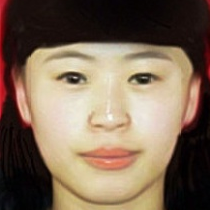

In [11]:
facial_detection(all_images[0], 10)

Putting it all together

In [12]:
os.mkdir("data/all_images_cropped/m_train")
os.mkdir("data/all_images_cropped/m_test")

os.mkdir("data/all_images_cropped/f_train")
os.mkdir("data/all_images_cropped/f_test")

In [20]:
def crop_all(images, margin):
    for image in images:
        split_image = str(image).split("\\")
        dir = split_image[-2]
        filename = split_image[-1]
        cropped_img = facial_detection(image, margin)
        cropped_img.save(f"data/all_images_cropped/{dir}/{filename}")

In [23]:
margin = 10
crop_all(all_images, margin)

1/1 [==============================] - ETA: 0s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 178ms/step


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 183ms/step
